In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.filters import threshold_local
from PIL import Image

In [15]:
# Sample file out of the dataset
file_name = 'struk.jpg'
img = Image.open(file_name)
img.thumbnail((800,800), Image.ANTIALIAS)
img

FileNotFoundError: [Errno 2] No such file or directory: 'struk.jpg'

In [3]:
def opencv_resize(image, ratio):
    width = int(image.shape[1] * ratio)
    height = int(image.shape[0] * ratio)
    dim = (width, height)
    return cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

In [4]:
def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [5]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

In [19]:
image = cv2.imread(file_name)
resize_ratio = 720 / image.shape[0]
original = image.copy()
image = opencv_resize(image, resize_ratio)

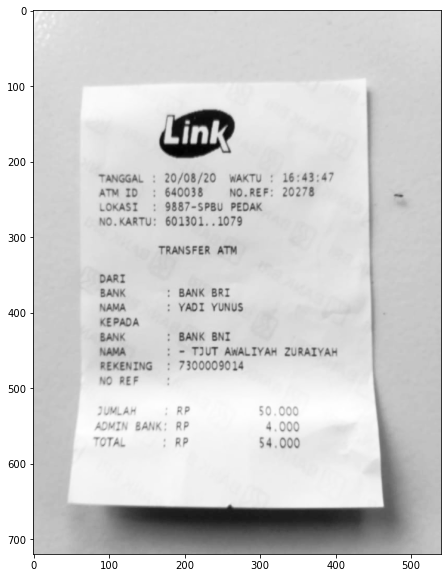

In [20]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_gray(gray)

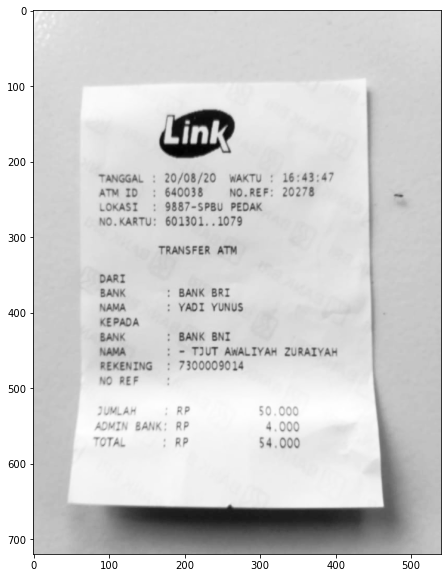

In [38]:
# Get rid of noise with Gaussian Blur filter
blurred = cv2.GaussianBlur(gray, (1,1), 0)
plot_gray(blurred)

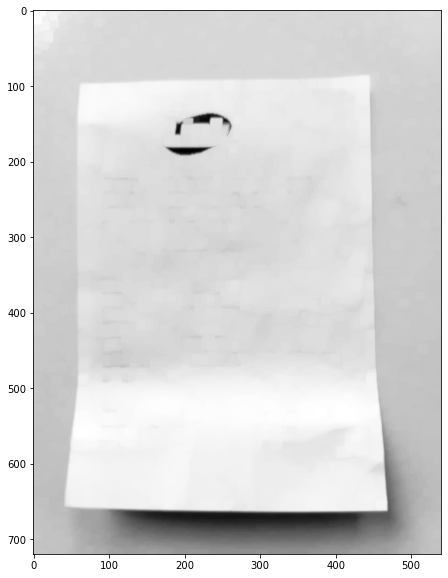

In [39]:
# Detect white regions
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
dilated = cv2.dilate(blurred, rectKernel)
plot_gray(dilated)

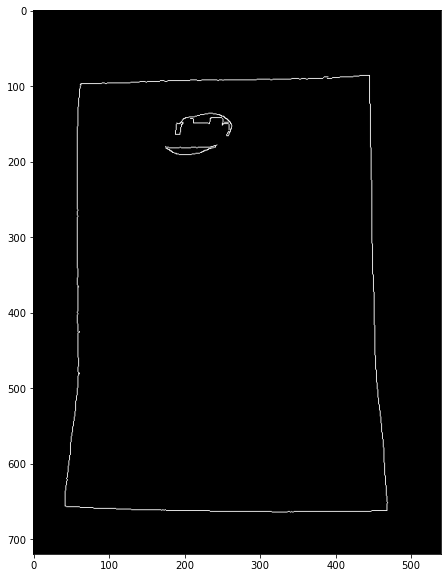

In [42]:
edged = cv2.Canny(dilated, 90, 20, apertureSize=3)
plot_gray(edged)

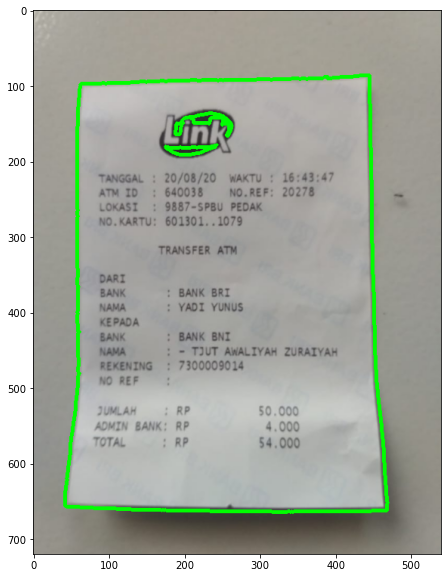

In [43]:
# Detect all contours in Canny-edged image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0,255,0), 3)
plot_rgb(image_with_contours)

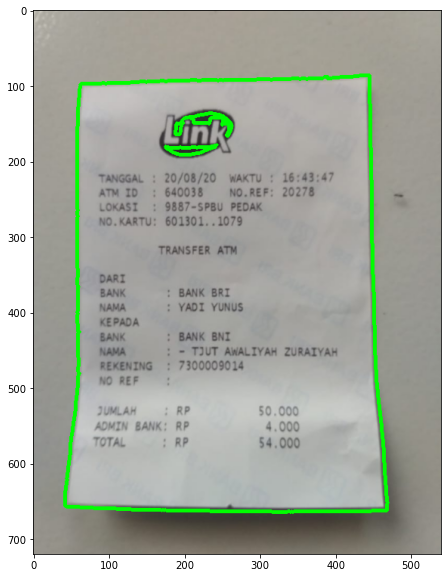

In [44]:
# Get 10 largest contours
largest_contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
image_with_largest_contours = cv2.drawContours(image.copy(), largest_contours, -1, (0,255,0), 3)
plot_rgb(image_with_largest_contours)

In [45]:
# approximate the contour by a more primitive polygon shape
def approximate_contour(contour):
    peri = cv2.arcLength(contour, True)
    return cv2.approxPolyDP(contour, 0.032 * peri, True)

In [46]:
def get_receipt_contour(contours):    
    # loop over the contours
    for c in contours:
        approx = approximate_contour(c)
        # if our approximated contour has four points, we can assume it is receipt's rectangle
        if len(approx) == 4:
            return approx

In [47]:
get_receipt_contour(largest_contours)

In [48]:
receipt_contour = get_receipt_contour(largest_contours)
image_with_receipt_contour = cv2.drawContours(image.copy(), [receipt_contour], -1, (0, 400, 0), 2)
plot_rgb(image_with_receipt_contour)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2599: error: (-215:Assertion failed) reader.ptr != NULL in function 'cvDrawContours'
